# Creating multi-panel figures

You can create yourself multi-panel figures by directly using the underlying Matplotlib objects. We however also provide a simplified way to create such panels by assembling multiple plot or animation objects. This is particularly helpful to create complex animations.

In [1]:
#%load_ext autoreload
#%autoreload 2

In [2]:
import skimage.io
from microfilm import microplot
from microfilm import microanim

In [3]:
image = skimage.io.imread('../demodata/coli_nucl_ori_ter.tif')

## Micropanel

First we create two microimages that we can adjust as we like

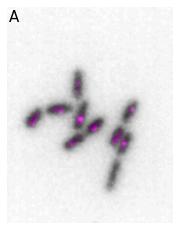

In [4]:
microim1 = microplot.microshow(images=[image[0, 10, :, :], image[1, 10, :, :]],
                               cmaps=['gray', 'pure_magenta'], flip_map=[True, False],
                               label_text='A', label_color='black')

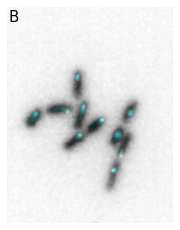

In [5]:
microim2 = microplot.microshow(images=[image[0, 10, :, :], image[2, 10, :, :]],
                               cmaps=['gray', 'pure_cyan'], flip_map=[True, False],
                               label_text='B', label_color='black')

Then we create a Micropanel object as aa grid and just add our two microimages. Those are then exactly reproduced, including annotations in the panels. Note that we can use any option used in ```matplotlib.pyplot.subplots()``` when creating the figure. Also the indices used to place the plots (e.g.g ```pos=[0,0]```) correspond to the xy position in the grid.

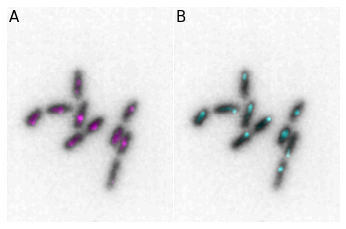

In [6]:
micropanel = microplot.Micropanel(rows=1, cols=2, figscaling=3)

micropanel.add_element(pos=[0,0], microim=microim1)
micropanel.add_element(pos=[0,1], microim=microim2)

By default, the panel size is adjusted to optimall fit the image size. **Note that for this adjustment we assume that all images in the panel of the same size.** As shown above, you can adjust the general size of the image with the ```figscaling``` paramter. If you want, you can also explicitly specify a figure size in which case no adjustments are done:

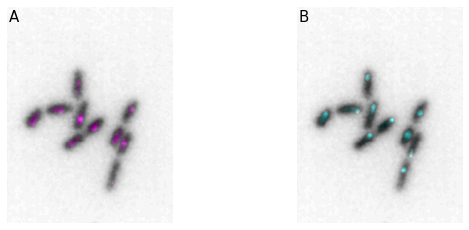

In [7]:
micropanel_size = microplot.Micropanel(rows=1, cols=2, figsize=[8,3], figscaling=3)

micropanel_size.add_element(pos=[0,0], microim=microim1)
micropanel_size.add_element(pos=[0,1], microim=microim2)

In the end you can save the panel with the regular ```savefig``` method:

In [8]:
micropanel.savefig('../illustrations/panel.png', bbox_inches = 'tight', pad_inches = 0, dpi=600)

This of course works with all the options available in Microimage:

/Users/gw18g940/GoogleDrive/BernMIC/Projects/microfilm/microfilm/colorify.py:66: UserWarning: No appropriate color found for your colormap. Using black.'
  warnings.warn(f"No appropriate color found for your colormap. Using black.'")


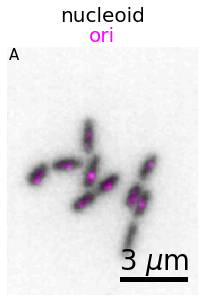

In [9]:
microim1 = microplot.microshow(images=[image[0, 10, :, :], image[1, 10, :, :]],
                               cmaps=['gray', 'pure_magenta'], flip_map=[True, False],
                               label_text='A', label_color='black', channel_label_show=True,
                               channel_names=['nucleoid', 'ori'], scalebar_size_in_units=3,
                              scalebar_unit_per_pix=0.05, scalebar_color='black', unit='um', fig_scaling=4)

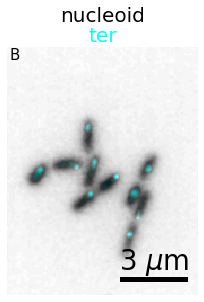

In [10]:
microim2 = microplot.microshow(images=[image[0, 10, :, :], image[2, 10, :, :]],
                               cmaps=['gray', 'pure_cyan'], flip_map=[True, False],
                               label_text='B', label_color='black', channel_label_show=True,
                              channel_names=['nucleoid', 'ter'], scalebar_size_in_units=3,
                              scalebar_unit_per_pix=0.05, scalebar_color='black', unit='um', fig_scaling=4)

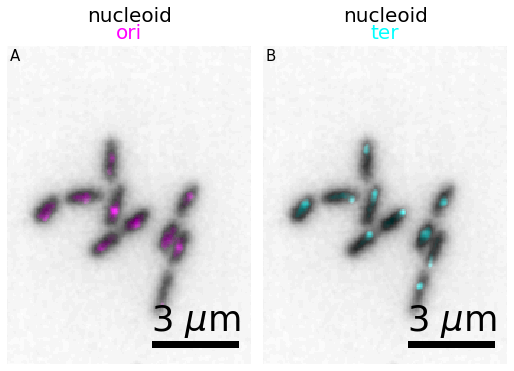

In [11]:
micropanel = microplot.Micropanel(rows=1, cols=2, margin=0.05)

micropanel.add_element(pos=[0,0], microim=microim1)
micropanel.add_element(pos=[0,1], microim=microim2)

micropanel.add_channel_label(channel_label_size=0.04)

## Micropanel animations

The same principle applies for animations. We first create them separately to have full control over creation and tehn integrate them in the panel.

In [12]:
%matplotlib widget

In [13]:
microanim1 = microanim.Microanim(data=image[[0,1],::], cmaps=['gray', 'pure_magenta'],
                                 flip_map=[True, False], label_text='A', label_color='black',
                                channel_label_show=True, channel_names=['nucleoid', 'ori'])
microanim2 = microanim.Microanim(data=image[[0,2],::], cmaps=['gray', 'pure_cyan'],
                                 flip_map=[True, False], label_text='B', label_color='black',
                                channel_label_show=True, channel_names=['nucleoid', 'ter'])

microanim1.add_time_stamp(unit='T', unit_per_frame='3', location='lower-right', timestamp_color='black')

In [14]:
microanim1.ui

In [15]:
microanim2.ui

In [16]:
animpanel = microanim.Microanimpanel(rows=1, cols=2)
animpanel.add_element(pos=[0,0], microanim=microanim1)
animpanel.add_element(pos=[0,1], microanim=microanim2)

animpanel.add_channel_label()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [17]:
animpanel.ui

Exporting the panel works the same way as for the simple animations. For example the above animation can be saved with:

In [18]:
animpanel.save_movie('../illustrations/panel.gif')

You get access to the underlying objects in the panel via the ```microanims``` parameter. Hence you can still update elements after assembling them. For example you could add a timer:

In [19]:
animpanel.microanims[0,1].add_time_stamp(unit='T',unit_per_frame=3, location='lower_left', timestamp_color='red')